# Objetivo del dataset:
Predecir en qué planeta se encuentra una tripulación en base a ciertos parámetros, como la aceleración de la gravedad medida y otros factores relevantes.

Imagina que en el futuro una nave espacial tripulada parte de la Tierra hacia el planeta Neptuno.
Durante el viaje, la tripulación permanece en estado de animación suspendida. En el trayecto la nave
sufre una grave avería y el sistema automático de control la dirige al cuerpo celeste más cercano,
donde realiza un aterrizaje de emergencia. Al posarse sobre la superficie, el sistema de soporte vital
de la nave reanima a la tripulación.
Una vez despiertos, los tripulantes descubren que el sistema de posicionamiento espacial no
funciona y por el momento no tienen comunicación con la Tierra ni pueden mirar al exterior de la
nave por razones de seguridad. Así que no saben dónde están, no tienen ningún dato del exterior,
ni posibilidad de conseguirlo, ni saben cuánto tiempo ha pasado.
En su trayecto entre la Tierra y Neptuno han podido estar cerca de la propia Tierra, Marte, Júpiter,
Saturno, Urano, Neptuno y las lunas de cualquiera de ellos.

Necesitan saber dónde están para reajustar el sistema de soporte vital y poder sobrevivir a medio
plazo en espera de una posible misión de rescate. La tripulación nota su propio peso muy parecido
al que sentía en la Tierra, aunque el dato puede ser engañoso por la pérdida de masa muscular
durante el viaje. Por lo tanto, teniendo en cuenta los valores de la aceleración de la gravedad en los
planetas del sistema solar:


In [3]:
import pandas as pd

data = {'Planeta': ['Tierra', 'Marte', 'Júpiter', 'Saturno', 'Urano', 'Neptuno'],
        'g (m/s²)': [9.8, 3.7, 24.8, 9.0, 8.7, 11.0]}

df = pd.DataFrame(data)

print(df)

   Planeta  g (m/s²)
0   Tierra       9.8
1    Marte       3.7
2  Júpiter      24.8
3  Saturno       9.0
4    Urano       8.7
5  Neptuno      11.0


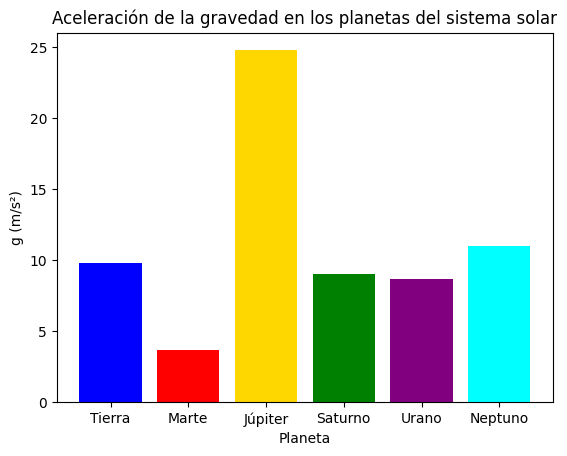

In [13]:
import matplotlib.pyplot as plt
colors = ['blue', 'red', 'gold', 'green', 'purple', 'cyan']

fig, ax = plt.subplots()
ax.bar(df['Planeta'], df['g (m/s²)'], color=colors)  

ax.set_xlabel('Planeta')
ax.set_ylabel('g (m/s²)')
ax.set_title('Aceleración de la gravedad en los planetas del sistema solar')

plt.show()

Parece obvio que no están en Marte, Júpiter ni en ninguna de las lunas de cualquier planeta. Pero
podrían estar sobre Saturno, Urano, Neptuno o la propia Tierra, si el accidente se hubiera producido
antes de estar más cerca de Marte que del punto de partida.

A la tripulación se le ocurre determinar un valor experimental de la aceleración de la gravedad, g,
para saber dónde se encuentran, comparando el resultado con los valores de la tabla anterior. Para
calcularla, dejan caer un pequeño objeto con velocidad inicial nula desde una altura determinada y
cronometran el tiempo que tarda en recorrerla. Para ello disponen de una cinta milimetrada con una
resolución de 10 mm y un cronómetro con marcas cada 10 milésimas de segundo.


In [33]:
data = {'Planeta   ': ['Tierra', 'Marte', 'Júpiter', 'Saturno', 'Urano', 'Neptuno'],
        'Aceleración (g)': [9.8, 3.7, 24.8 , 9.0, 8.7, 11.0],
        'Tiempo de caída (t)': [None,None, None, None, None, None],
        'Altura (h)': [None, None, None, None, None, None]}

df = pd.DataFrame(data)
print(df)

  Planeta     Aceleración (g) Tiempo de caída (t) Altura (h)
0     Tierra              9.8                None       None
1      Marte              3.7                None       None
2    Júpiter             24.8                None       None
3    Saturno              9.0                None       None
4      Urano              8.7                None       None
5    Neptuno             11.0                None       None


L = 1/2 x g x t^2

A.- Con una longitud L= 1.00 m cronometran t = 0.46 s.

    ¿Cuánto vale g y su error?
 
    ¿En qué planeta están, o pueden estar?



In [30]:
import numpy as np

L = 1.00  # m
t = 0.46  # s
delta_L = 0.01  # m
delta_t = 0.01  # s


g = 2 * L / t**2


dg_dL = 2 / t**2
dg_dt = -4 * L / t**3

delta_g = np.sqrt((dg_dL * delta_L)**2 + (dg_dt * delta_t)**2)

g, delta_g

df = pd.DataFrame({'Aceleración de la gravedad medida (g)': [g],
                   'Error en la medición de g': [delta_g]})

print(df)


   Aceleración de la gravedad medida (g)  Error en la medición de g
0                               9.451796                   0.421677


Dado que g = 9.45 m/s^2 + - 0.42 m/s², podemos calcular el rango de valores posibles para g:

Rango inferior: 9.45 - 0.42 = 9.03 m/s^2
Rango superior: 9.45 + 0.42 = 9.87 m/s^2

Teniendo en cuenta los datos de la tabla, podemos saber que la tripulación podría estar en:

Saturno (g = 9.0 m/s^2) ya que 9.0 está dentro del rango de 9.03 a 9.87 m/s^2.

Tierra (g = 9.8 m/s^2) ya que 9.8 también está dentro del rango de 9.03 a 9.87 m/s^2.



B.- Con una longitud L=2.00 m cronometran t = 0.66 s.

    ¿Cuánto vale g y su error?

    ¿En qué planeta están, o pueden estar?
 
    ¿Con que probabilidad puedes afirmarlo?

In [34]:
L = 2.00  # m
t = 0.66  # s


g = 2 * L / t**2


dg_dL = 2 / t**2
dg_dt = -4 * L / t**3


delta_g = np.sqrt((dg_dL * delta_L)**2 + (dg_dt * delta_t)**2)

g, delta_g

df = pd.DataFrame({'Aceleración de la gravedad medida (g)': [g],
                   'Error en la medición de g': [delta_g]})

print(df)

   Aceleración de la gravedad medida (g)  Error en la medición de g
0                               9.182736                   0.282027


Ahora, podemos calcular el rango de valores posibles para g:

Rango inferior: 9.18 - 0.28 = 8.90 m/s^2
Rango superior: 9.18 + 0.28 = 9.46 m/s^2

Podemos concluir que la tripulación podría estar en:

Saturno (g = 9.0 m/s^2) ya que 9.0 está dentro del rango de 8.90 a 9.46 m/s^2.
Dado que solo Saturno se encuentra dentro del rango calculado, podemos afirmar con cierta confianza que la tripulación está en Saturno en este caso.

Dado que los datos obtenidos en el apartado a y b nos permiten descartar varios planetas, podemos calcular una probabilidad aproximada basada en la información proporcionada. 

Apartado a:

g ≈ 9.45 m/s^2 y Δg ≈ 0.42 m/s^2
Rango: 9.03 m/s^2 a 9.87 m/s^2

Apartado b:

g ≈ 9.18 m/s^2 y Δg ≈ 0.28 m/s^2
Rango: 8.90 m/s^2 a 9.46 m/s^2

Podemos ver que ambos rangos incluyen solo a Saturno (g = 9.0 m/s^2) como el planeta en el que podría estar la tripulación. Suponiendo que la tripulación podría haber estado en cualquiera de los cuatro planetas posibles (Tierra, Saturno, Urano y Neptuno) antes de realizar las mediciones, podemos calcular la probabilidad aproximada de estar en Saturno como 1/1, ya que es el único planeta que se encuentra en ambos rangos. Esto nos daría una probabilidad del 100%.

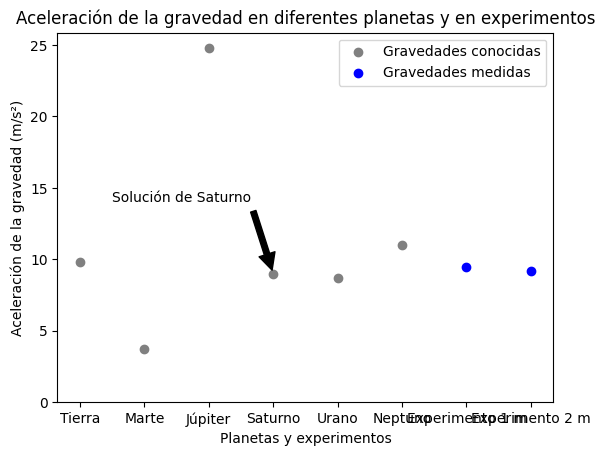

In [36]:
planetas = ['Tierra', 'Marte', 'Júpiter', 'Saturno', 'Urano', 'Neptuno']
gravedades = [9.8, 3.7, 24.8, 9.0, 8.7, 11.0]

L = [1.0, 2.0]
t = [0.46, 0.66]
g = []

for i in range(len(L)):
    g.append(2 * L[i] / t[i]**2)

fig, ax = plt.subplots()

ax.scatter(planetas, gravedades, color='gray', label='Gravedades conocidas')

ax.scatter(['Experimento 1 m', 'Experimento 2 m'], g, color='blue', label='Gravedades medidas')

ax.annotate('Solución de Saturno', xy=('Saturno', 9.0), xytext=(0.5, 14),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_title('Aceleración de la gravedad en diferentes planetas y en experimentos')
ax.set_xlabel('Planetas y experimentos')
ax.set_ylabel('Aceleración de la gravedad (m/s²)')

ax.set_ylim(bottom=0)

ax.legend()

plt.show()


